In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
import seaborn as sns 
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Credit card /creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print('This data frame has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

This data frame has 284807 rows and 31 columns.


In [ ]:
fraud = data[data['Class'] == 1]
nonfraud = data[data['Class'] == 0]

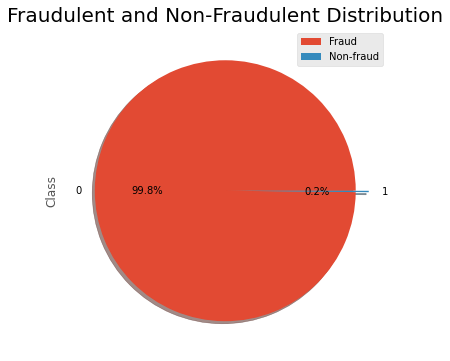

In [ ]:
data["Class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Fraud", "Non-fraud"])
plt.show()

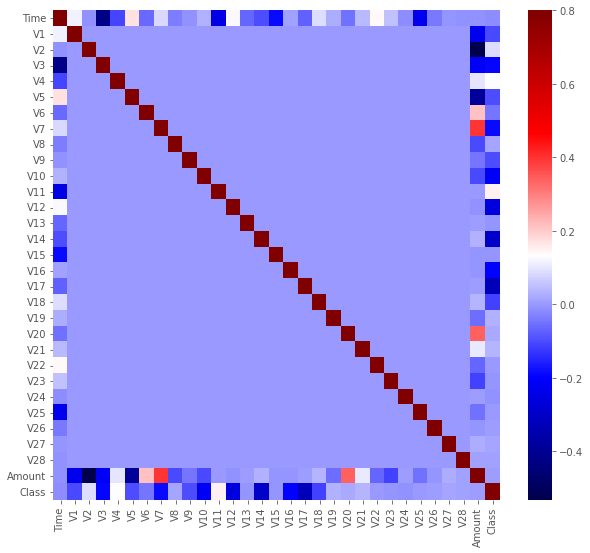

In [ ]:
plt.figure(figsize=(10,9))
sns.heatmap(data=data.corr(), vmax = .8, cmap="seismic")
plt.show();

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data1=data.copy()

Model 1(Over-Sampling)

In [ ]:
# Create two different dataframes of majority and minority class 
data_fraud = data1[data1.Class==1]
data_non_fraud = data1[data1.Class==0]

# Oversample the minority class
from sklearn.utils import resample
data_fraud_oversampled = resample(data_fraud, 
                                 replace=True,    # sample with replacement
                                 n_samples=len(data_non_fraud) , # to match majority class with len(df_majority) rows
                                 random_state=42)  # reproducible results

# Combine majority class with oversampled minority class
data_oversampled = pd.concat([data_fraud_oversampled, data_non_fraud])

In [ ]:
data_oversampled.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

[Text(0, 0, 'Non_Fraudulent'), Text(0, 0, 'Fraudulent')]

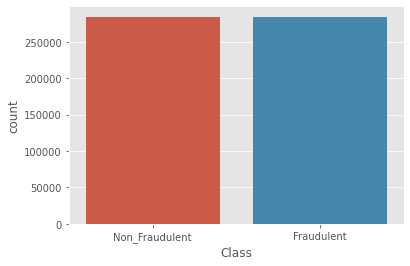

In [ ]:
g = sns.countplot(data_oversampled.Class)
g.set_xticklabels(['Non_Fraudulent','Fraudulent'])

In [ ]:
y = data_oversampled.Class
X = data_oversampled.drop(['Class'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)
X_train.shape, X_test.shape

((398041, 30), (170589, 30))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train.shape, X_test.shape

((398041, 30, 1), (170589, 30, 1))

In [ ]:
epochs=20
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D((2)),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 28, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 11, 64)            12352     
                                                                 
 flatten (Flatten)           (None, 704)               0

In [ ]:
model_cnn.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
history = model_cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
12439/12439 [==============================] - 79s 5ms/step - loss: 0.0286 - accuracy: 0.9917 - val_loss: 0.0136 - val_accuracy: 0.9965
Epoch 2/10
12439/12439 [==============================] - 65s 5ms/step - loss: 0.0171 - accuracy: 0.9972 - val_loss: 0.0132 - val_accuracy: 0.9986
Epoch 3/10
12439/12439 [==============================] - 75s 6ms/step - loss: 0.0201 - accuracy: 0.9979 - val_loss: 0.0100 - val_accuracy: 0.9990
Epoch 4/10
12439/12439 [==============================] - 65s 5ms/step - loss: 0.0160 - accuracy: 0.9980 - val_loss: 0.0436 - val_accuracy: 0.9967
Epoch 5/10
12439/12439 [==============================] - 74s 6ms/step - loss: 0.0179 - accuracy: 0.9982 - val_loss: 0.0186 - val_accuracy: 0.9985
Epoch 6/10
12439/12439 [==============================] - 75s 6ms/step - loss: 0.0202 - accuracy: 0.9982 - val_loss: 0.0271 - val_accuracy: 0.9986
Epoch 7/10
12439/12439 [==============================] - 75s 6ms/step - loss: 0.0137 - accuracy: 0.9984 - val_loss: 0

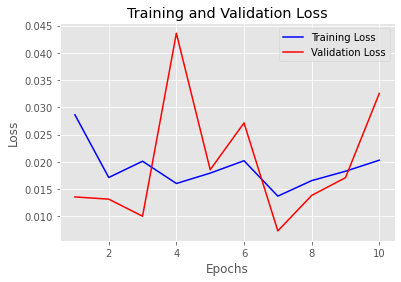

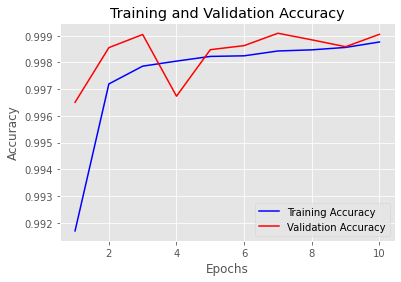

In [ ]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('cnn_loss_plot.png')
plt.show()

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('cnn_acc_plot.png')
plt.show()

In [ ]:
val_predictions = model_cnn.predict(X_test)
pred=np.around(val_predictions)
pred

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       1.00      1.00      1.00     85295

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



Model 2 - Max Pooling

In [ ]:
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

In [ ]:
y = data['Class']
X = data.drop(['Class'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((227845, 31), (56962, 31))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train.shape, X_test.shape

((227845, 31, 1), (56962, 31, 1))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [ ]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 30, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 30, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30, 32)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 29, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 29, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 29, 64)           

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
7121/7121 [==============================] - 39s 5ms/step - loss: 0.0229 - accuracy: 0.9939 - val_loss: 0.0047 - val_accuracy: 0.9994
Epoch 2/20
7121/7121 [==============================] - 36s 5ms/step - loss: 0.0054 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 3/20
7121/7121 [==============================] - 36s 5ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 4/20
7121/7121 [==============================] - 35s 5ms/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 5/20
7121/7121 [==============================] - 37s 5ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 6/20
7121/7121 [==============================] - 35s 5ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 7/20
7121/7121 [==============================] - 37s 5ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0033 - val_ac

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

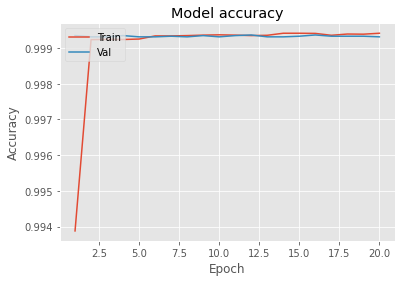

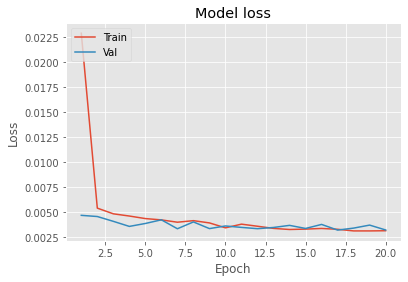

In [ ]:
plot_learningCurve(history, epochs)

In [ ]:
val_predictions = model.predict(X_test)
pred=np.around(val_predictions)
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.71      0.78        98

    accuracy                           1.00     56962
   macro avg       0.93      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



Model 3 - DNN Weighted Neural Network

In [ ]:
print(X.shape)
print(y.shape)

(284807, 31)
(284807,)


In [ ]:
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=.3)

In [ ]:
train_data, validation_data, train_targets, validation_targets = train_test_split(train_data, train_targets, test_size=.2)

In [ ]:
mean = np.mean(train_data)
std = np.std(train_data)


train_data -= mean
train_data /= std

validation_data -= mean
validation_data /= std

test_data -= mean
test_data /= std

In [ ]:
from keras import models, layers

In [ ]:
epochs=20
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(train_data.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                320       
                                                                 
 dense_5 (Dense)             (None, 8)                 88        
                                                                 
 dense_6 (Dense)             (None, 6)                 54        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 469
Trainable params: 469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_data, train_targets, epochs=epochs, validation_data=(test_data, test_targets), verbose=1)

Epoch 1/20
4985/4985 [==============================] - 19s 4ms/step - loss: 0.1816 - accuracy: 0.9548 - val_loss: 0.0166 - val_accuracy: 0.9983
Epoch 2/20
4985/4985 [==============================] - 18s 4ms/step - loss: 0.0101 - accuracy: 0.9982 - val_loss: 0.0061 - val_accuracy: 0.9983
Epoch 3/20
4985/4985 [==============================] - 19s 4ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 4/20
4985/4985 [==============================] - 18s 4ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9995
Epoch 5/20
4985/4985 [==============================] - 18s 4ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9995
Epoch 6/20
4985/4985 [==============================] - 19s 4ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 7/20
4985/4985 [==============================] - 19s 4ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0035 - val_ac

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

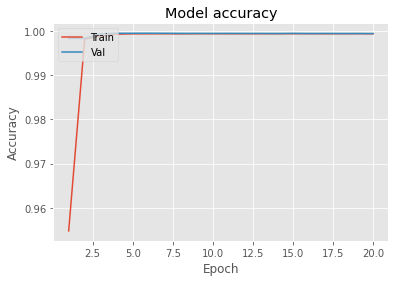

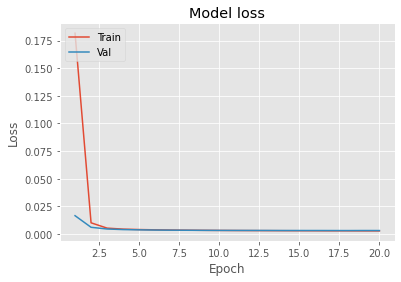

In [ ]:
plot_learningCurve(history, epochs)

In [ ]:
val_predictions = model.predict(test_data)
pred=np.around(val_predictions)
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print(classification_report(test_targets, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.88      0.75      0.81       142

    accuracy                           1.00     85443
   macro avg       0.94      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
train_targets.value_counts()

0    159204
1       287
Name: Class, dtype: int64

In [ ]:
weights = {
    0:1,
    1:562
}

In [ ]:
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(train_data.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

# CHANGE
history = model.fit(train_data, train_targets, epochs=epochs, validation_data=(test_data, test_targets), verbose=1, class_weight=weights)

Epoch 1/20
4985/4985 [==============================] - 19s 4ms/step - loss: 1.3085 - accuracy: 0.8208 - val_loss: 0.5156 - val_accuracy: 0.8975
Epoch 2/20
4985/4985 [==============================] - 18s 4ms/step - loss: 0.8703 - accuracy: 0.9407 - val_loss: 0.3437 - val_accuracy: 0.9571
Epoch 3/20
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5733 - accuracy: 0.9699 - val_loss: 0.2417 - val_accuracy: 0.9756
Epoch 4/20
4985/4985 [==============================] - 20s 4ms/step - loss: 0.4542 - accuracy: 0.9788 - val_loss: 0.1819 - val_accuracy: 0.9809
Epoch 5/20
4985/4985 [==============================] - 19s 4ms/step - loss: 0.3954 - accuracy: 0.9826 - val_loss: 0.1500 - val_accuracy: 0.9832
Epoch 6/20
4985/4985 [==============================] - 20s 4ms/step - loss: 0.3572 - accuracy: 0.9833 - val_loss: 0.1172 - val_accuracy: 0.9873
Epoch 7/20
4985/4985 [==============================] - 20s 4ms/step - loss: 0.3350 - accuracy: 0.9861 - val_loss: 0.1058 - val_ac

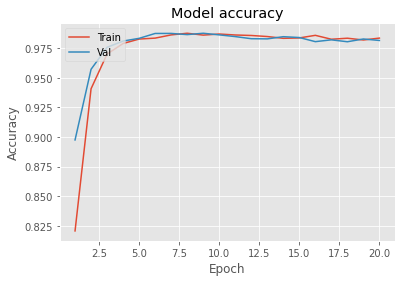

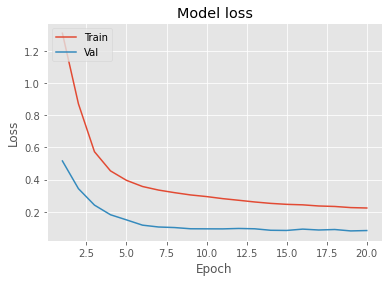

In [ ]:
plot_learningCurve(history, epochs)

In [ ]:
score = model.evaluate(test_data, test_targets, batch_size=100)
print('\nAnd the Score is ', score[1] * 100, '%')

855/855 [==============================] - 2s 2ms/step - loss: 0.0838 - accuracy: 0.9814

And the Score is  98.13677072525024 %


In [ ]:
predictions = model.predict(test_data)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_targets, predictions)

0.9729101800401593

In [ ]:
predictions = np.around(predictions)

In [ ]:
print(classification_report(test_targets, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.08      0.91      0.14       142

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.57     85443
weighted avg       1.00      0.98      0.99     85443



LSTM

In [ ]:
import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
col_del = ['Time' ,'V5', 'V6', 'V7', 'V8', 'V9','V13','V15', 'V16',  'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [ ]:
tr_data = data1.drop(col_del,axis =1)
tr_data.shape

(284807, 10)

In [ ]:
X = tr_data.drop(['Class'], axis = 'columns')
Label_Data = tr_data['Class']

In [ ]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(tr_data['Class'])
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(tr_data['Class'] == label)[0]

Counter({0: 284315, 1: 492})


In [ ]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_r, y = oversample.fit_resample(X, tr_data['Class'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

NameError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_r)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)

In [ ]:
X_train.shape

(398041, 9)

In [ ]:
X_test.shape

(170589, 9)

In [ ]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
train_LSTM_X=X_train
val_LSTM_X=X_test

## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

## Recuperation des labels
train_LSTM_y=y_train
val_LSTM_y=y_test

In [ ]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
inputs1=Input((1,9))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model1.fit(train_LSTM_X, train_LSTM_y,epochs=30,batch_size=20000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/30
20/20 [==============================] - 5s 49ms/step - loss: 0.6680 - accuracy: 0.8346 - val_loss: 0.6336 - val_accuracy: 0.8965
Epoch 2/30
20/20 [==============================] - 0s 23ms/step - loss: 0.5931 - accuracy: 0.8836 - val_loss: 0.5248 - val_accuracy: 0.8939
Epoch 3/30
20/20 [==============================] - 1s 26ms/step - loss: 0.4733 - accuracy: 0.8832 - val_loss: 0.3970 - val_accuracy: 0.8965
Epoch 4/30
20/20 [==============================] - 0s 24ms/step - loss: 0.3633 - accuracy: 0.8913 - val_loss: 0.3054 - val_accuracy: 0.9058
Epoch 5/30
20/20 [==============================] - 0s 23ms/step - loss: 0.2963 - accuracy: 0.9026 - val_loss: 0.2581 - val_accuracy: 0.9122
Epoch 6/30
20/20 [==============================] - 0s 22ms/step - loss: 0.2622 - accuracy: 0.9100 - val_loss: 0.2306 - val_accuracy: 0.9135
Epoch 7/30
20/20 [==============================] - 0s 24ms/step - loss: 0.2425 - accuracy: 0.9147 - val_loss: 0.2119 - val_accuracy: 0.9218
Epoch 8/30
20

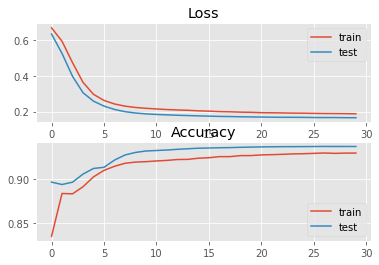

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Artificial Neural Network

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [ ]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 31), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 31), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 31), y_test: (85443,)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 256)               8192      
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 256)              

In [ ]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/300
78/78 [==============================] - 4s 18ms/step - loss: 0.8162 - fn: 64.0000 - fp: 74202.0000 - tn: 85002.0000 - tp: 223.0000 - precision: 0.0030 - recall: 0.7770 - val_loss: 0.6220 - val_fn: 11.0000 - val_fp: 3111.0000 - val_tn: 36693.0000 - val_tp: 58.0000 - val_precision: 0.0183 - val_recall: 0.8406
Epoch 2/300
78/78 [==============================] - 1s 9ms/step - loss: 0.6936 - fn: 39.0000 - fp: 62457.0000 - tn: 96747.0000 - tp: 248.0000 - precision: 0.0040 - recall: 0.8641 - val_loss: 0.5539 - val_fn: 12.0000 - val_fp: 858.0000 - val_tn: 38946.0000 - val_tp: 57.0000 - val_precision: 0.0623 - val_recall: 0.8261
Epoch 3/300
78/78 [==============================] - 1s 10ms/step - loss: 0.6132 - fn: 40.0000 - fp: 49060.0000 - tn: 110144.0000 - tp: 247.0000 - precision: 0.0050 - recall: 0.8606 - val_loss: 0.5151 - val_fn: 12.0000 - val_fp: 516.0000 - val_tn: 39288.0000 - val_tp: 57.0000 - val_precision: 0.0995 - val_recall: 0.8261
Epoch 4/300
78/78 [=================

In [ ]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 11s 4ms/step - loss: 0.0035 - fn: 27.0000 - fp: 9.0000 - tn: 85298.0000 - tp: 109.0000 - precision: 0.9237 - recall: 0.8015
[0.003522491082549095, 27.0, 9.0, 85298.0, 109.0, 0.9237288236618042, 0.8014705777168274]


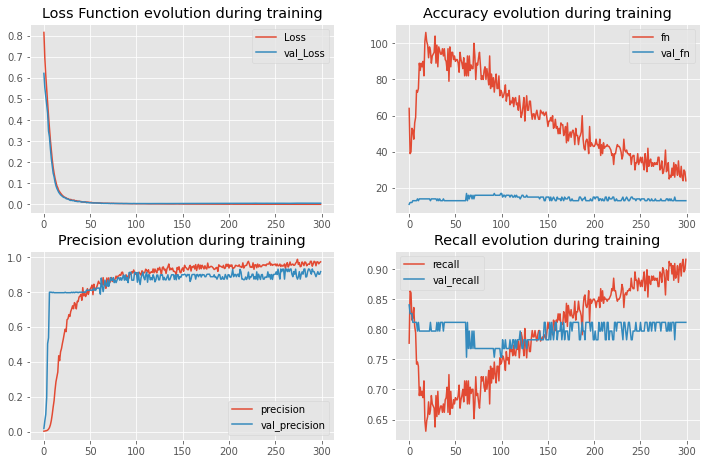

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:
                      0           1  accuracy      macro avg   weighted avg
precision       0.99990    1.000000    0.9999       0.999950       0.999900
recall          1.00000    0.944251    0.9999       0.972125       0.999900
f1-score        0.99995    0.971326    0.9999       0.985638       0.999898
support    159204.00000  287.000000    0.9999  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [    16    271]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999684    0.923729  0.999579      0.961706      0.999563
recall         0.999894    0.801471  0.999579      0.900683      0.999579
f1-score       0.999789    0.858268  0.999579      0.929028      0.999564
suppo

In [ ]:
y_train_pred = model1.predict(train_LSTM_X)
y_test_pred = model1.predict(val_LSTM_X)



In [ ]:
#print_score(train_LSTM_y, y_train_pred.round(), train=True)
print_score(val_LSTM_y, y_test_pred.round(), train=False)

scores_dict = {
    'LSTM': {
        'Train': f1_score(train_LSTM_y, y_train_pred.round()),
        'Test': f1_score(val_LSTM_y, y_test_pred.round()),
    },
}

Test Result:
Accuracy Score: 93.73%
_______________________________________________
Classification Report:
                      0             1  accuracy      macro avg   weighted avg
precision      0.895872      0.989054  0.937341       0.942463       0.942271
recall         0.990297      0.883947  0.937341       0.937122       0.937341
f1-score       0.940721      0.933551  0.937341       0.937136       0.937151
support    85645.000000  84944.000000  0.937341  170589.000000  170589.000000
_______________________________________________
Confusion Matrix: 
 [[84814   831]
 [ 9858 75086]]



XG Boost

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.97%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999711    0.983673  0.999687       0.991692       0.999682
recall          0.999975    0.839721  0.999687       0.919848       0.999687
f1-score        0.999843    0.906015  0.999687       0.952929       0.999674
support    159204.000000  287.000000  0.999687  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159200      4]
 [    46    241]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.932773  0.999614      0.966240      0.999600
recall         0.999906    0.816176  0.999614      0.908041      0.999614
f1-score       0.999807    0.870588  0.999614      0.935197      0.999601


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159204.0  287.0       1.0   159491.0      159491.0
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999695    0.924370   0.99959      0.962033      0.999575
recall         0.999894    0.808824   0.99959      0.904359      0.999590
f1-score       0.999795    0.862745   0.99959      0.931270      0.999577
support    85307.000000  136.000000   0.99959  85443.000000  85443.000000


LigthBGM

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.86%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999441    0.592814  0.998589       0.796128       0.998709
recall          0.999146    0.689895  0.998589       0.844521       0.998589
f1-score        0.999293    0.637681  0.998589       0.818487       0.998643
support    159204.000000  287.000000  0.998589  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159068    136]
 [    89    198]]

Test Result:
Accuracy Score: 99.75%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999460    0.350195  0.997507      0.674827      0.998427
recall         0.998042    0.661765  0.997507      0.829904      0.997507
f1-score       0.998751    0.458015  0.997507      0.728383      0.997890


Model Comparision

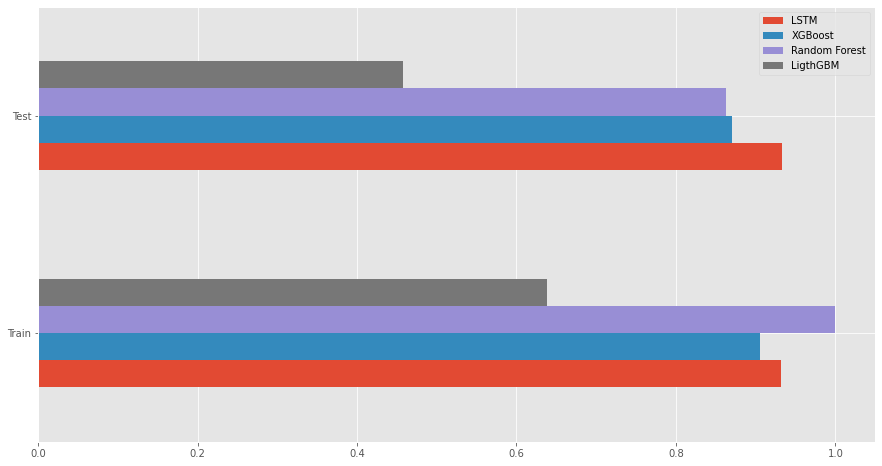

In [ ]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))